인플레이션이 국내 철강 분야에 미치는 영향

In [255]:
# 모듈 설치 및 데이터 주소 설정
import pandas as pd
import matplotlib.pyplot as plt
import re
import platform
import numpy
import datetime as dt
path_price ='./data/소비자물가_2017_202206.xls'
path_oil ='./data/원유가격_202107_202206.xlsx'
path_steel ='./data/철강_가격_2017_2022.xls'
path_charge ='./data/상하이컨테이너운임지수_2022.xlsx'

# 데이터 전처리

1. 철강 가격 데이터프레임 전처리

In [256]:

# 철강 가격 데이터프레임 가공
df_steel = pd.read_excel(path_steel,header=2,thousands=',')
# 컬럼 이름 정리
df_steel = df_steel.rename(columns={'Unnamed: 0':'철광석종류'})
# 불필요한 열 제거
df_steel = df_steel.loc[:5]
# 철광석 종류 컬럼에서 str만 추출
steel_str_list=[]
for steel in df_steel['철광석종류']:
    steel_str = re.split('[()]',steel)
    steel_str_list.append(steel_str[0])    
df_steel['철광석종류'] = steel_str_list   

# 값을 int로 변환
df_steel.iloc[:,1:] = df_steel.iloc[:,1:].astype(int)
df_steel = df_steel.set_index(df_steel['철광석종류'])
df_steel = df_steel.drop('철광석종류',axis=1)
df_steel = df_steel.transpose()

# 그래프전용 리스트 성성
steel_x_list=list(df_steel.index)
steel_label =list(df_steel.columns[:])
steel_y_list=list(df_steel['철광석'])

print(steel_x_list)
print(steel_label)
print(steel_y_list)

['2017상반기', '2017하반기', '2018상반기', '2018하반기', '2019상반기', '2019하반기', '2020상반기', '2020하반기', '2021상반기', '2021하반기', '2022상반기']
['철광석', '철스크랩-국내', '철스크랩-수입', '철근', '열연', '냉연']
[78, 73, 73, 74, 84, 101, 91, 126, 182, 137, 141]


In [257]:
df_steel

철광석종류,철광석,철스크랩-국내,철스크랩-수입,철근,열연,냉연
2017상반기,78,259,318,657,684,912
2017하반기,73,288,352,646,677,889
2018상반기,73,309,423,741,908,1056
2018하반기,74,314,397,782,916,1043
2019상반기,84,299,368,772,718,880
2019하반기,101,253,353,685,603,805
2020상반기,91,217,314,541,592,798
2020하반기,126,247,358,670,719,901
2021상반기,182,374,508,919,1511,1723
2021하반기,137,498,626,1093,2041,2354


2. 소비자물가 데이터프레임 전처리

In [258]:
df_price = pd.read_excel(path_price,  header=2)
df_price = df_price.rename(columns={'Unnamed: 0':'기간'})
df_price = df_price.iloc[0,1:]

#값을 int로 변환
df_price = df_price.astype(float)
print(df_price)

#그래프전용 리스트 생성
price_x_list=list(df_price.index)
price_y_list=list(df_price)

print(price_x_list)
print(price_y_list)

2017       1.9
2018       1.5
2019       0.4
2020       0.5
2021       2.5
202201월    3.6
202202월    3.7
202203월    4.1
202204월    4.8
202205월    5.4
202206월    6.0
Name: 0, dtype: float64
['2017', '2018', '2019', '2020', '2021', '202201월', '202202월', '202203월', '202204월', '202205월', '202206월']
[1.9, 1.5, 0.4, 0.5, 2.5, 3.6, 3.7, 4.1, 4.8, 5.4, 6.0]


3. 원유가격 데이터프레임 전처리

In [259]:
df_oil = pd.read_excel(path_oil)
print(df_oil)  

# 값 float 변환
df_oil.iloc[:,1:] = df_oil.iloc[:,1:].astype(float)

df_oil = df_oil.rename(columns={'구 분':'기간'})
df_oil = df_oil.set_index('기간')

#df_oil.index = sorted(df_oil.index)
df_oil = df_oil[['WTI','Dubai']]
df_oil = df_oil.sort_index(ascending=True)
print(df_oil)
# 그래프 전용 리스트 생성
# oil_x_label = list(df_oil['구 분'])
# oil_y_label1 = list(df_oil['WTI'])
# oil_y_label2 = list(df_oil['Dubai'])
# #oil_y_label = [oil_y_label1,oil_y_label2]

# print(oil_x_label)
# print(oil_y_label1)
# print(oil_y_label2)

          구 분     WTI   Brent   Dubai
0    2022년 6월  114.34  117.50  113.27
1    2022년 5월  109.26  111.96  108.16
2    2022년 4월  101.64  105.92  102.82
3    2022년 3월  108.26  112.46  110.93
4    2022년 2월   91.63   94.10   92.36
5    2022년 1월   82.98   85.57   83.47
6   2021년 12월   71.69   74.80   73.21
7   2021년 11월   78.65   80.85   80.30
8   2021년 10월   81.22   83.75   81.61
9    2021년 9월   71.54   74.88   72.63
10   2021년 8월   67.71   70.51   69.50
11   2021년 7월   72.43   74.29   72.93
              WTI   Dubai
기간                       
2021년 10월   81.22   81.61
2021년 11월   78.65   80.30
2021년 12월   71.69   73.21
2021년 7월    72.43   72.93
2021년 8월    67.71   69.50
2021년 9월    71.54   72.63
2022년 1월    82.98   83.47
2022년 2월    91.63   92.36
2022년 3월   108.26  110.93
2022년 4월   101.64  102.82
2022년 5월   109.26  108.16
2022년 6월   114.34  113.27


4. 운임지수 데이터프레임 전처리

In [260]:
df_charge = pd.read_excel(path_charge)
df_charge = df_charge.iloc[:,1:]
print(df_charge)

df_charge = df_charge.astype(float)
df_charge = df_charge.transpose()
df_charge.head()

df_charge.index = df_charge.index.str[:7]
#df_charge['date'] = df_charge.index
#df_charge['date'] = pd.to_datetime(df_charge['date'])
#print(df_charge)
# df_charge['date'] = df_charge['date'].to_period('m')
df_charge_month = df_charge.groupby([df_charge.index])[0].mean()
# df_charge_month = df_charge_month.set_index('date',inplace=True)
print(df_charge_month)
# print(df_charge)

   2021.01.08  2021.01.15  2021.01.22  2021.01.29  2021.02.05  2021.02.10  \
0     2870.34        2885     2868.95     2861.69     2884.61     2825.75   

   2021.02.19  2021.02.26  2021.03.05  2021.03.12  ...  2022.05.13  \
0     2875.93     2775.29     2721.94     2637.53  ...     4147.83   

   2022.05.20  2022.05.27  2022.06.02  2022.06.10  2022.06.17  2022.06.24  \
0     4162.69     4175.35     4208.01     4233.31     4221.96     4216.13   

   2022.07.01  2022.07.08  2022.07.15  
0     4203.27     4143.87      4074.7  

[1 rows x 79 columns]
2021.01    2871.495000
2021.02    2840.395000
2021.03    2628.505000
2021.04    2830.292000
2021.05    3341.690000
2021.06    3712.690000
2021.07    4037.630000
2021.08    4308.297500
2021.09    4590.242000
2021.10    4596.585000
2021.11    4561.785000
2021.12    4887.068000
2022.01    5066.860000
2022.02    4915.136667
2022.03    4586.605000
2022.04    4242.860000
2022.05    4162.402500
2022.06    4219.852500
2022.07    4140.613333
Name: 0, 

In [261]:
df_charge_month

2021.01    2871.495000
2021.02    2840.395000
2021.03    2628.505000
2021.04    2830.292000
2021.05    3341.690000
2021.06    3712.690000
2021.07    4037.630000
2021.08    4308.297500
2021.09    4590.242000
2021.10    4596.585000
2021.11    4561.785000
2021.12    4887.068000
2022.01    5066.860000
2022.02    4915.136667
2022.03    4586.605000
2022.04    4242.860000
2022.05    4162.402500
2022.06    4219.852500
2022.07    4140.613333
Name: 0, dtype: float64

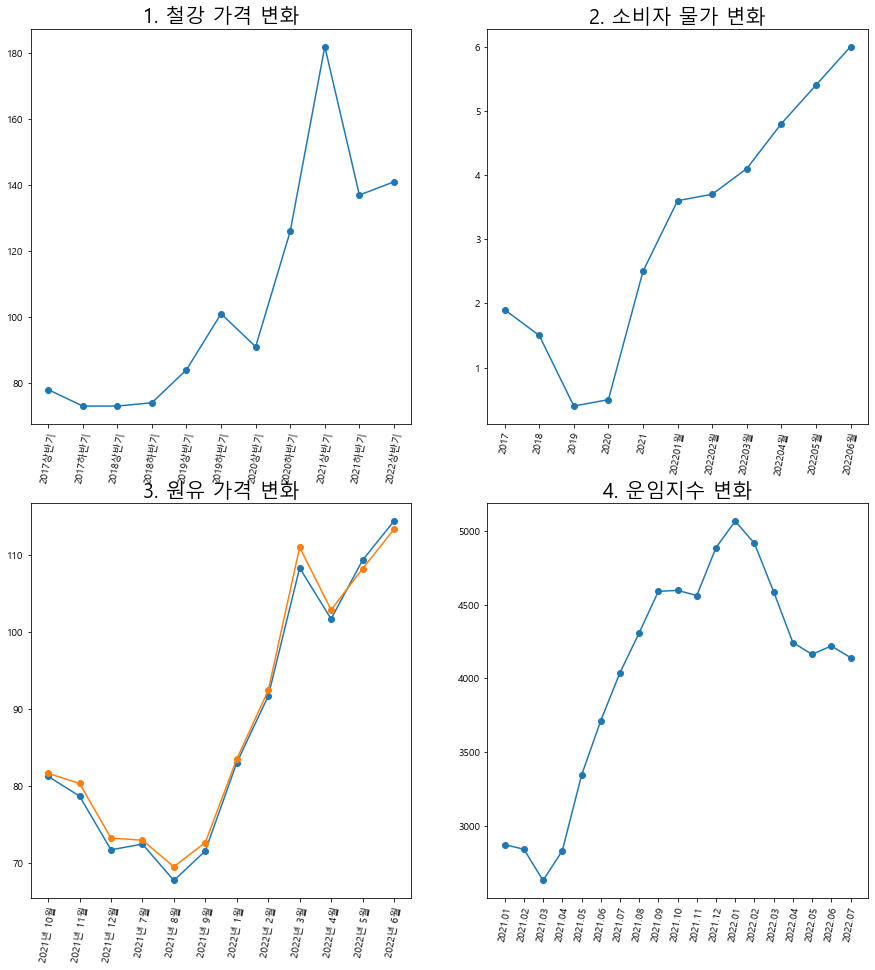

In [262]:
if	platform.system()	==	'Windows':
    plt.rc('font',	family='Malgun Gothic')
else:
    plt.rc('font',	family='AppleGothic')

fig, axes = plt.subplots(2,2, figsize=(15, 16))

plt.subplot(2,2,1)
plt.plot(steel_x_list,steel_y_list ,marker='o')
plt.xticks(rotation=80) 
plt.title('1. 철강 가격 변화',fontsize=20)

#plt.legend(steel_label)    
#plt.xlabel(steel_x_list)

plt.subplot(2,2,2)
plt.plot(price_x_list,price_y_list,marker='o')
plt.xticks(rotation=80)
plt.title('2. 소비자 물가 변화',fontsize=20)

plt.subplot(2,2,3)
#plt.plot(oil_x_label,oil_y_label1,marker='o')
#plt.plot(oil_x_label,oil_y_label2,marker='o')
plt.plot(df_oil,marker='o')
plt.xticks(rotation=80)
plt.title('3. 원유 가격 변화',fontsize=20)

plt.subplot(2,2,4)
plt.plot(df_charge_month,marker='o')
plt.xticks(rotation=80)
plt.title('4. 운임지수 변화',fontsize=20)
plt.show()
